# Chapter 1: Introduction
* **Reference Book** - Pattern Recognition and Machine Learning by _Christopher M. Bishop_
* For Mthematical formulas in the markdown cells I used [LaTex](http://crab.rutgers.edu/~karel/latex/contents.html)<br>

Consider the problem of recognising the hand written digits which are each (28x28) pixels. In a _Machine Learning_ approach for recognising the digits, we can use a large set of **N** digits called the _training set_ to tune the parameters of the model. Each digit can be represented as a _vector_ of image pixels which can be used to recognize the digit. The categories of the digits in the training data are known in advance.<br>
The result of running a _Machine Learning_ algorithms can be expressed as a function y(x). The precise form of the function y(x) is determined during the training phase, called the _learning phase_.<br>
Pre-Processing of the data, also known as _feature extraction_ is very necessary. And, same rules should be used for the training and test data for feature extraction.
- Supervised Learning - Applications in which training data comprises examples of _input vectors_ along with their corresponding _target vactor_ <br>
    - Classification problems - Cases in which the aim is to assign each imput vector to one of the finite number of discrete categories
    - Regression - if the desired output consists of one or more continuous variables
- Unsupervised Learning - Problems in which the training data onsists of a set of input vectors without any corresponding target values. The goal here may be to discover similar groups or clusters
- Reinforced Learning - Problem of finding the suitable actions to take i9n a given situation in order to maximize the rewards. Here the learning algorithm must discover the optimal output by traial and error.
    - Credit assignment problem
    - Reinforced Learning continues to be an active area of Machine LEarning Research
<br>
- Intro to:
    - Probability Theory
    - Decision Theory
    - Information Theory
    


In [25]:
%matplotlib inline 
# Importing the Libraries
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt # For plotting
import random # to generate random numbers
from scipy import stats
import math

#### Plot of \begin{equation}\ y  = sin(2 * \pi * x) \end{equation} for N = 10

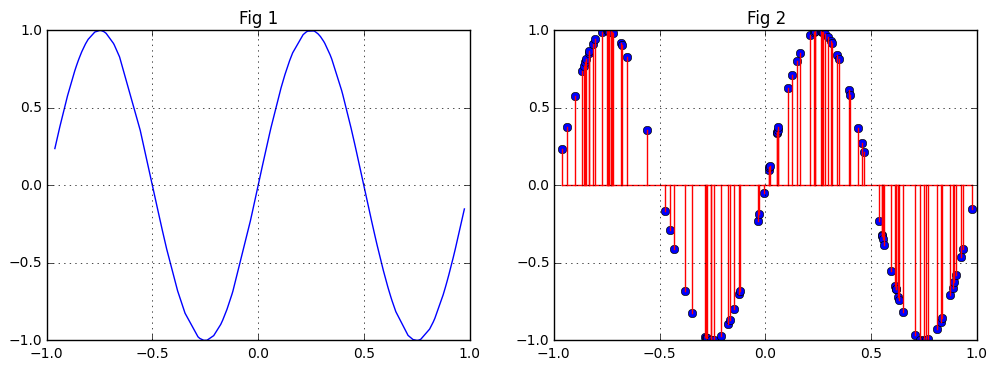

In [54]:
x = sorted(list(random.uniform(-1, 1) for x in range(100))) # List Comprhension
y = list(np.sin(2*np.pi*x[i]) for i in range(100))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.grid(True)
plt.title('Fig 1')
plt.plot(x,y)

plt.subplot(122)
plt.grid(True)
plt.title('Fig 2')
plt.stem(x,y, 'r') #Cretes the stem plot with each point dropping to the horizontal axis
plt.show()

#### Example: Polynomial Curve Fitting

### Probability Theory
The key concept in pattern recognition is the uncertainity that arises due to noise aswell as due to the finite size of the data. Probability theory forms one of the central piece in patter recognition.
- Product Rule and Sum Rule(Marginal Probability) of probability can be pictured as a box with gridlines and the grids in the x-axis and y-axis corresponding to random variables X and Y
- The probability that a Random Variable \begin{equation} \ X \text{will take a value} \  x_i \text{and Random Variable }\ Y \text{will take a value } \ y_j \text{is written as }\end{equation} \begin{equation} \ p(X = x_i, Y = y_j) \end{equation} and is called the _Joint Probability._
    - \begin{equation} \ p(X = x_i, Y = y_j) = n_ij/N \text{     ------------1} \end{equation}
- Sum Rule says that the probability of X taking the value x_i irrespective of the valye of Y is : <br>
\begin{equation} \ p(X=x_i) = \Sigma\ (p(X = x_i, Y = y_j)) = c_i/N\text{     Summation over all j's ------------2} \end{equation} 
\begin{equation} \ p(X=x_i) = \Sigma\ (p(X = x_i, Y = y_j))\text{     -----This is called the Sum Rule, Summation over all j's} \end{equation}  
<br>
- Conditional Probability - if we consider only those instances where random variable \begin{equation} \ X = x_i\text{ , then the fraction of such instances for which} \ Y = y_j\text {is written as:} \end{equation} \begin{equation} \ p(Y = y_i | X = x_i)\end{equation}  and is called conditional probaility.<br>

\begin{equation} \ p(Y = y_i | X = x_i) = n_ij / c_i \text{     ------------3} \end{equation} 

- using 1, 2 & 3:<br>
\begin{equation} \ p(X = x_i, Y = y_j) = n_ij/N = (n_ij/c_i) * (c_i/N) = p(Y = y_i | X = x_i) * p(X=x_i) \text{----- This is the product rule} \end{equation}  

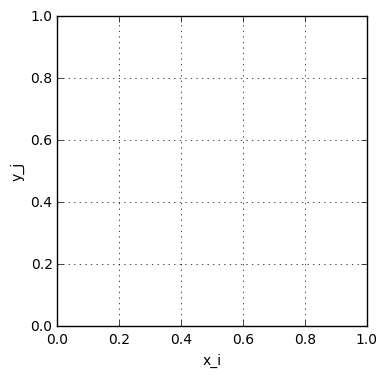

In [70]:
#visualize the above formulas in this grid
plt.figure(figsize=(4,4))
plt.grid()
plt.xlabel('x_i')
plt.ylabel('y_j')
plt.show()

## Bayes' theorem 
This is a very important theoerm in pattern recognition and machine learning. Here is an interesting [video](https://www.youtube.com/watch?v=BrK7X_XlGB8) <br>
Since the \begin{equation} \ p(X, Y) = p(Y, X) \end{equation}, and using the product rule derived above we get:<br>
\begin{equation} \ p(Y|X) = p(X|Y) * p(Y) / p(X)\end{equation} 
and, \begin{equation} \ p(X) = \Sigma\ (p(X|Y) *  p(Y)) \text{-----Summation over Y}\end{equation} - this can be viewed as a normalization constant to ensure the sum of all conditional probabilities to be equal to 1 <br>

This equates to - _posterior œ Likelihood * prior_ <br>
An important interpretation of Bayes' theorem is in terms of the **Prior Probability & Posterior Probability**

#### Let's visualise the bayesian probability

- Probability Densities
- Cumulative distribution function
- The sum and product rules of probabilities, as well as Bayes' theorem, apply equally to the case of probability densities. The sum & product rule for continuous variable is explained in the branch of mathematics - **measure theory**
- Jacobian Factor/Matrix - The first order partial derivative of a function

**What's the difference between the Bayesian and Classical/Frequentist views?** <br>
[Video](https://www.youtube.com/watch?v=KhAUfqhLakw) & [link](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) to JakeVDP's github

In [10]:
# Generating some simple photon count data

np.random.seed(1)  # for repeatability
F_true = 1000  # true flux, say number of photons measured in 1 second
N = 50 # number of measurements
F = stats.poisson(F_true).rvs(N)  # N measurements of the flux
e = np.sqrt(F)  # errors on Poisson counts estimated via square root

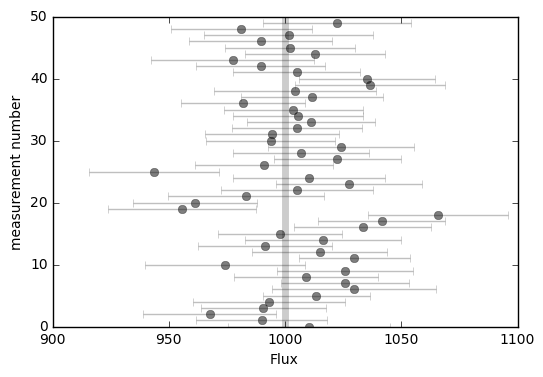

In [22]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux");ax.set_ylabel("measurement number");
fig.show()

In [20]:
ax.errorbar?

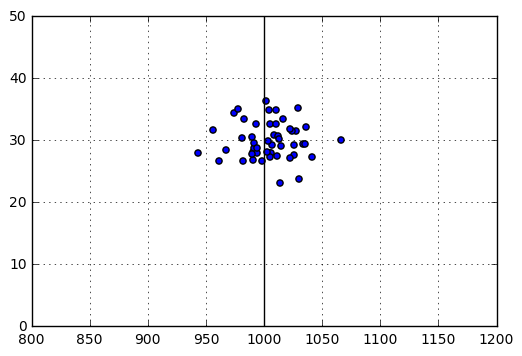

In [16]:
# Simple example of photon flux
np.random.seed(1)
e = np.random.normal(30, 3, 50)
F = np.random.normal(1000, e)

#Plotting
plt.scatter(F, e)
plt.grid()
plt.xlim(800, 1200)
plt.ylim(0, 50)
plt.vlines(1000, 0, N)
plt.show()

### Build a naive-bayes spam classifier

**Expectation & Covariance:**<br>
- Expectatiopn of a function \begin{equation}\ f(x) \text { under a probability distribution } \ p(x) \text { is the average value that the function takes and is given by: } \end{equation} \begin{equation}\ E[f] = \int p(x) * f(x)\,dx \end{equation}
- Covariance indicates the level to which two variables vary together.

In [75]:
a = list(random.randint(1,100) for i in range(10)) # generating a list of random integers
b = list(random.randint(1,10) for i in range(10))
np.var(a), np.average(a) #Calculates variance and Expectation of a vector

(732.63999999999999, 49.600000000000001)

In [83]:
c = np.array([a, b]).T
c

array([[18,  7],
       [ 9, 10],
       [65,  1],
       [60,  3],
       [94,  5],
       [42,  4],
       [76,  4],
       [16,  3],
       [71,  6],
       [45,  1]])

In [84]:
np.cov(c)

array([[  6.05000000e+01,  -5.50000000e+00,   3.52000000e+02,
          3.13500000e+02,   4.89500000e+02,   2.09000000e+02,
          3.96000000e+02,   7.15000000e+01,   3.57500000e+02,
          2.42000000e+02],
       [ -5.50000000e+00,   5.00000000e-01,  -3.20000000e+01,
         -2.85000000e+01,  -4.45000000e+01,  -1.90000000e+01,
         -3.60000000e+01,  -6.50000000e+00,  -3.25000000e+01,
         -2.20000000e+01],
       [  3.52000000e+02,  -3.20000000e+01,   2.04800000e+03,
          1.82400000e+03,   2.84800000e+03,   1.21600000e+03,
          2.30400000e+03,   4.16000000e+02,   2.08000000e+03,
          1.40800000e+03],
       [  3.13500000e+02,  -2.85000000e+01,   1.82400000e+03,
          1.62450000e+03,   2.53650000e+03,   1.08300000e+03,
          2.05200000e+03,   3.70500000e+02,   1.85250000e+03,
          1.25400000e+03],
       [  4.89500000e+02,  -4.45000000e+01,   2.84800000e+03,
          2.53650000e+03,   3.96050000e+03,   1.69100000e+03,
          3.20400000e+03

##### The Gaussian distribution

For the case of a real valued variable x, the gaussian distribution is defined as :

\begin{equation}\ N(x |\mu , \sigma ^2) = \frac{1}{\sqrt{(2  \pi  \sigma ^2)}}  exp(\frac{-1}{2 \sigma^2}(x - \mu)^2)\end{equation}

And the area under the gaussian curve is normalised:
\begin{equation}\int  N(x |\mu , \sigma ^2)dx = 1\end{equation}

And, expectation of a function x under gaussion distribution is given be :
\begin{equation}\ E[x] = \int  N(x |\mu , \sigma ^2)xdx = \mu\end{equation}

The second order moment is given by :
\begin{equation}\ E[x^2] = \int  N(x |\mu , \sigma ^2)x^2dx = \mu^2 + \sigma^2\end{equation}

Using the above 2 equations, the variance of the function x is given by :
\begin{equation}\ var[x] = E[x^2] - E[x]^2 = \sigma^2\end{equation}

_Similarly, we can define the Gaussian distribution of a D-dimensional vector x in continuous variable_

In [43]:
# Defining a Gaussian Distribution:
def get_norm_dist_func(x, mu, sigma):
    return (1/math.sqrt(2*math.pi*sigma*sigma))*math.exp((-1/(2*sigma*sigma))* (x-mu)*(x-mu))

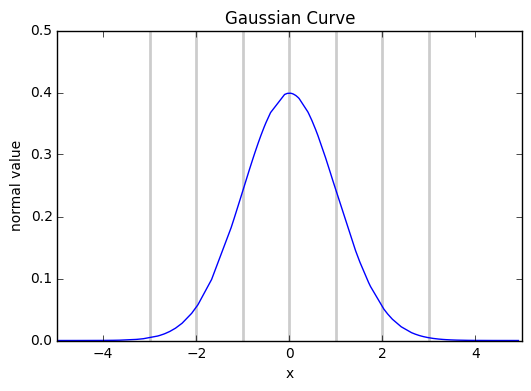

In [52]:
random.seed(1)
x = sorted(list(random.uniform(-5,5) for i in range(100)))
y = list(get_norm_dist_func(x[i], 0, 1) for i in range(100))

plt.plot(x, y)
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.title('Gaussian Curve')
plt.xlabel('x')
plt.ylabel('normal value')
plt.vlines(0, 0, N, linewidth=2, alpha=0.2)
plt.vlines(-1, 0, N, linewidth=2, alpha=0.2)
plt.vlines(1, 0, N, linewidth=2, alpha=0.2)
plt.vlines(-2, 0, N, linewidth=2, alpha=0.2)
plt.vlines(2, 0, N, linewidth=2, alpha=0.2)
plt.vlines(-3, 0, N, linewidth=2, alpha=0.2)
plt.vlines(3, 0, N, linewidth=2, alpha=0.2)
plt.show()

In [33]:
random.uniform?